In [1]:
import pandas as pd
import sys 
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.extend(['../'])

from tools import read_stat_history_date, read_stat_history_dates_combined, combine_result, create_pdf_filename, rename_columns

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10,7)})
sns.set_context()
sns.set_palette("tab10")

In [2]:
test_setup_1 = {"user": 25, "spawn_rate": 1, "runtime": "41s", "test_type": "polygon-analysis", "environment": "local", "combine_method": "median", "layers": 25}
test_setup_2 = {"user": 25, "spawn_rate": 1, "runtime": "41s", "test_type": "polygon-analysis", "environment": "local", "combine_method": "median", "layers": 50}

In [3]:
system_dfs_combined_1 = read_stat_history_dates_combined(**test_setup_1)
system_dfs_combined_2 = read_stat_history_dates_combined(**test_setup_2)

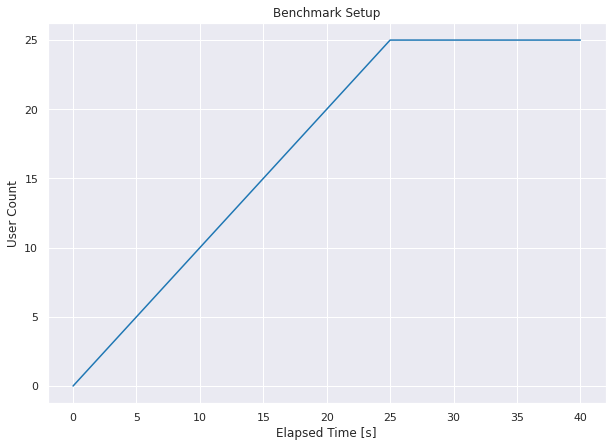

In [4]:
rastless_df = system_dfs_combined_1["rastless"]
ax = sns.lineplot(data=rastless_df, x=rastless_df.index, y="User Count")
ax.set_title('Benchmark Setup')
filename = create_pdf_filename(f"./result_images/{test_setup_1['test_type']}", "user_count", test_setup_1)
plt.savefig(filename)

In [12]:
df_median_response_1 = combine_result(system_dfs_combined_1, "Total Median Response Time")
df_median_response_1 = rename_columns(df_median_response_1, test_setup_1, "layers")

df_median_response_2 = combine_result(system_dfs_combined_2, "Total Median Response Time")
df_median_response_2 = rename_columns(df_median_response_2, test_setup_2, "layers")

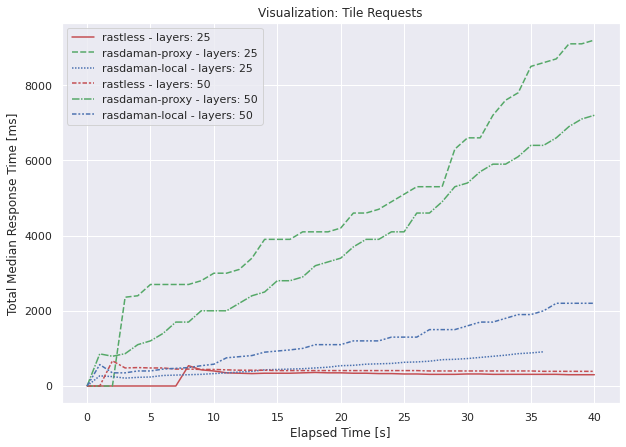

In [19]:
df_median_response_merge = pd.concat([df_median_response_1, df_median_response_2], axis=1)
ax = sns.lineplot(data=df_median_response_merge, palette=['r', 'g', 'b', 'r', 'g', 'b'])
ax.set(ylabel='Total Median Response Time [ms]')
ax.set_title('Visualization: Tile Requests')
filename = create_pdf_filename(f"./result_images/{test_setup_1['test_type']}", "total_median_response_time", test_setup_1)
plt.savefig(filename)

In [20]:
df_mean_response_1 = combine_result(system_dfs_combined_1, "Total Average Response Time")
df_mean_response_1 = rename_columns(df_mean_response_1, test_setup_1, "layers")

df_mean_response_2 = combine_result(system_dfs_combined_2, "Total Average Response Time")
df_mean_response_2 = rename_columns(df_mean_response_2, test_setup_2, "layers")

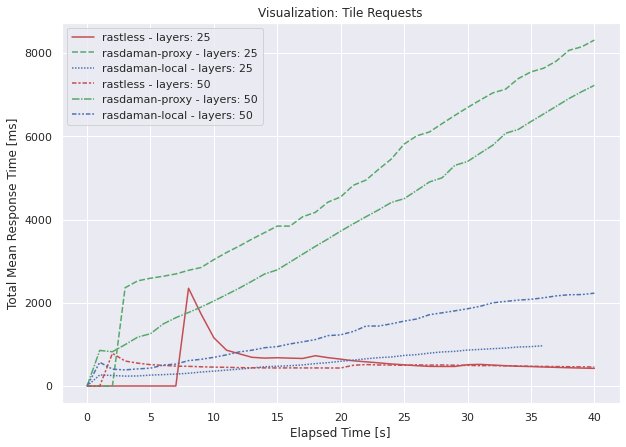

In [23]:
df_mean_response_merge = pd.concat([df_mean_response_1, df_mean_response_2], axis=1)
ax = sns.lineplot(data=df_mean_response_merge, palette=['r', 'g', 'b', 'r', 'g', 'b'])
ax.set(ylabel='Total Mean Response Time [ms]')
ax.set_title('Visualization: Tile Requests')
filename = create_pdf_filename(f"./result_images/{test_setup_1['test_type']}", "total_mean_response_time", test_setup_1)
plt.savefig(filename)

In [24]:
df_request_s_1 = combine_result(system_dfs_combined_1, "Requests/s")
df_request_s_1 = rename_columns(df_request_s_1, test_setup_1, "layers")

df_request_s_2 = combine_result(system_dfs_combined_2, "Requests/s")
df_request_s_2 = rename_columns(df_request_s_2, test_setup_2, "layers")

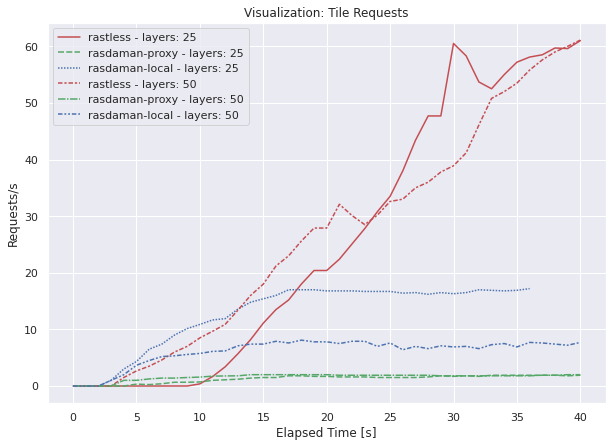

In [26]:
df_request_s_merge = pd.concat([df_request_s_1, df_request_s_2], axis=1)

ax = sns.lineplot(data=df_request_s_merge, palette=['r', 'g', 'b', 'r', 'g', 'b'])
ax.set(ylabel='Requests/s')
ax.set_title('Visualization: Tile Requests')
filename = create_pdf_filename(f"./result_images/{test_setup_1['test_type']}", "requests_per_second", test_setup_1)
plt.savefig(filename)

In [27]:
df_request_total_count_1 = combine_result(system_dfs_combined_1, "Total Request Count")
df_request_total_count_1 = rename_columns(df_request_total_count_1, test_setup_1, "layers")

df_request_total_count_2 = combine_result(system_dfs_combined_2, "Total Request Count")
df_request_total_count_2 = rename_columns(df_request_total_count_2, test_setup_2, "layers")

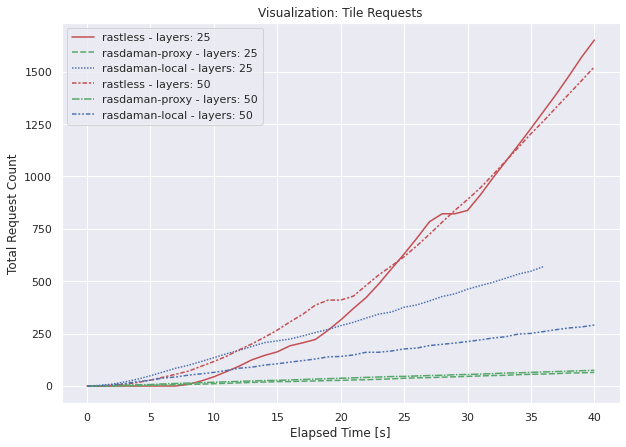

In [29]:
df_request_total_count_merge = pd.concat([df_request_total_count_1, df_request_total_count_2], axis=1)

ax = sns.lineplot(data=df_request_total_count_merge, palette=['r', 'g', 'b', 'r', 'g', 'b'])
ax.set(ylabel="Total Request Count")
ax.set_title('Visualization: Tile Requests')
filename = create_pdf_filename(f"./result_images/{test_setup_1['test_type']}", "tile_requests_count", test_setup_1)
plt.savefig(filename)